In [97]:
# Load packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing 

In [98]:
# Import of Feelnc Classifier output
data = pd.read_csv('lncRNA_classes.txt', sep='\t')

# import deg transcript lncRNA
deg_na = pd.read_csv('../9_1_dea_lncrna/deg_data/Normoxia to Anoxia_lncrna.csv', sep=',')
deg_nr = pd.read_csv('../9_1_dea_lncrna/deg_data/Normoxia to Reoxygenation_lncrna.csv', sep=',')
deg_ar = pd.read_csv('../9_1_dea_lncrna/deg_data/Anoxia to Reoxygenation_lncrna.csv', sep=',')
deg = pd.concat([deg_na, deg_nr, deg_ar])

# Import common 33882 lncRNAs
common = pd.read_csv('../6_identify_common_lncRNA/common_lncrna_transcript_id.csv', sep='\t')

In [99]:
# add new column to filter subsets later 
data['subset'] = 'None'
# add subset information to the whole dataframe
data['subset'][data['lncRNA_transcript'].str.lower().isin(common['transcript_id'])] = 'lncRNA'
data['subset'][data['lncRNA_transcript'].str.lower().isin(deg['transcript_id'])] = 'deg lncRNA'
# drop the rows that are not in a subset
data.drop(data[data['subset'] == 'None'].index, inplace=True)

/tmp/ipykernel_8734/1769169812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subset'][data['lncRNA_transcript'].str.lower().isin(common['transcript_id'])] = 'lncRNA'
/tmp/ipykernel_8734/1769169812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subset'][data['lncRNA_transcript'].str.lower().isin(deg['transcript_id'])] = 'deg lncRNA'


In [100]:
len(data['lncRNA_transcript'].unique())

32082

In [101]:
num_interaction_partner = data.loc[data['subset'] == 'deg lncRNA']

In [102]:
len(num_interaction_partner['lncRNA_transcript'].drop_duplicates())

3313

In [103]:
# show me the minimum interaction partner transcripts 
num_interaction_partner['lncRNA_transcript'].value_counts().min()

1

In [104]:
# show me the maximum interaction partner transcripts
num_interaction_partner['lncRNA_transcript'].value_counts().max()

27

In [105]:
# show me median interaction partner transcripts
num_interaction_partner['lncRNA_transcript'].value_counts().median()

2.0

In [106]:
num_interaction_partner.loc[num_interaction_partner['isBest'] ==1]

,isBest,lncRNA_gene,lncRNA_transcript,partnerRNA_gene,partnerRNA_transcript,direction,type,distance,subtype,location,subset
5,1,STRG.38406,STRG.38406.1,ccar_ua20-g18761,ccar_ua20-g18761.t1,strand_unknow,intergenic,695,unknow strand(s),upstream,deg lncRNA
128,1,STRG.42763,STRG.42763.2,ccar_ua23-g21278,ccar_ua23-g21278.t1,sense,intergenic,5638,same_strand,downstream,deg lncRNA
159,1,STRG.46948,STRG.46948.4,ccar_ub01-g23318,ccar_ub01-g23318.t2.1.6676f649,antisense,intergenic,73199,divergent,upstream,deg lncRNA
191,1,STRG.72209,STRG.72209.4,ccar_ub15-g36988,ccar_ub15-g36988.t1,antisense,intergenic,9014,divergent,upstream,deg lncRNA
273,1,STRG.22491,STRG.22491.2,ccar_ua11-g10839,ccar_ua11-g10839.t1,antisense,genic,0,overlapping,exonic,deg lncRNA
...,...,...,...,...,...,...,...,...,...,...,...
113667,1,STRG.72738,STRG.72738.8,ccar_ub15-g37341,ccar_ub15-g37341.t1,antisense,intergenic,4219,convergent,downstream,deg lncRNA
113715,1,STRG.77336,STRG.77336.4,ccar_ub18-g39900,ccar_ub18-g39900.t1.1.6676f68a,antisense,genic,0,overlapping,exonic,deg lncRNA
113729,1,STRG.21594,STRG.21594.1,ccar_ua10-g10304,ccar_ua10-g10304.t1,strand_unknow,intergenic,10596,unknow strand(s),upstream,deg lncRNA
113758,1,STRG.19943,STRG.19943.1,ccar_ua09-g9512,ccar_ua09-g9512.t1.4.6676f580,strand_unknow,intergenic,1054,unknow strand(s),upstream,deg lncRNA


In [107]:
# export the transcript id's of the interaction partners for the subset of deg lncRNAs
num_interaction_partner.to_csv('deg_lncrna_interaction_partners.txt', sep='\t', index=False)

# 1 Number of Interaction partners found

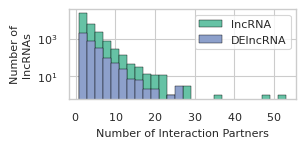

In [108]:
# PLOT: distance of Interaction partner to lncRNA
sns.set_theme(style='whitegrid', palette='colorblind', context='paper', rc={
    'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'legend.fontsize': 8, 'legend.title_fontsize': 8, "axes.formatter.use_mathtext": True
})
plt.figure(figsize=((8 / 2.54), (4 / 2.54)))
plt.hist(data['lncRNA_transcript'].value_counts(), color='#66C2A5', edgecolor='black', linewidth=0.3, bins=range(1, data['lncRNA_transcript'].value_counts().max() +1, 2))
plt.hist(data.loc[data['subset'] == 'deg lncRNA','lncRNA_transcript'].value_counts(), color='#8DA0CB', 
        edgecolor='black', linewidth=0.3, bins=range(1,data.loc[data['subset'] == 'deg lncRNA','lncRNA_transcript'].value_counts().max() +1, 2))
plt.legend(['lncRNA', 'DElncRNA'], loc='upper right')
plt.yscale('log')
plt.ylabel('Number of\nlncRNAs')
plt.xlabel('Number of Interaction Partners')
plt.tight_layout()

plt.savefig('lncRNA_interaction_partners.svg')
plt.show()

In [109]:
data.loc[data['subset'] == 'deg lncRNA','lncRNA_transcript'].value_counts().max()


27

# 2 Distance to Interaction Partner

In [110]:
# keep only the best interaction partner'
datab = data.loc[data['isBest'] ==1]

# Adjust the distance based on the location and convert to kb
datab['adjusted_distance_kb'] = datab.apply(lambda x: x['distance']/1000 if x['location'] == 'upstream' else -x['distance']/1000, axis=1)


/tmp/ipykernel_8734/1741332878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['adjusted_distance_kb'] = datab.apply(lambda x: x['distance']/1000 if x['location'] == 'upstream' else -x['distance']/1000, axis=1)


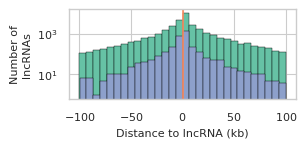

In [111]:
# PLOT: distance of Interaction partner to lncRNA
sns.set_theme(style='whitegrid', palette='colorblind', context='paper', rc={
    'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'legend.fontsize': 8, 'legend.title_fontsize': 8, "axes.formatter.use_mathtext": True
})
plt.figure(figsize=((8 / 2.54), (4/ 2.54)))

# Plot histogram with thinner edgecolor and alpha
plt.hist(datab['adjusted_distance_kb'], bins=30, edgecolor='black', linewidth=0.3, color='#66C2A5')
plt.hist(datab.loc[datab['subset'] == 'deg lncRNA', 'adjusted_distance_kb'], bins=30, edgecolor='black', linewidth=0.3, color='#8DA0CB')

plt.xlabel('Distance to lncRNA (kb)')
plt.ylabel('Number of\nlncRNAs')

plt.yscale('log')
# Add labels to the plot
plt.axvline(0, color='#FC8D62', linestyle='-')  # vertical line at x=0

# Display the plot
plt.tight_layout()
plt.savefig('lncRNA_interaction_distance.svg')
plt.show()


In [112]:
data['distance'].max()

99979

# 3 Classes of lncRNA

In [113]:
# remove lncRNAs with unknown strand information
datab = datab.loc[datab['subtype'] != 'unknow strand(s)']
# split df into genic and intergenic lncRNAs information for plotting 
datab_genic = datab.loc[datab['type'] == 'genic']
datab_intergenic = datab.loc[datab['type'] == 'intergenic']
# rename the value 'same_strand' to 'same strand' for better readability
datab_intergenic['subtype'] = datab_intergenic['subtype'].replace('same_strand', 'same strand')
datab_genic['direction'] = datab_genic['direction'].replace('strand_unknow', 'strand unknown')

/tmp/ipykernel_8734/3061571373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab_intergenic['subtype'] = datab_intergenic['subtype'].replace('same_strand', 'same strand')
/tmp/ipykernel_8734/3061571373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab_genic['direction'] = datab_genic['direction'].replace('strand_unknow', 'strand unknown')


In [114]:
delnc = datab.loc[datab['subset'] == 'deg lncRNA']
len(delnc['lncRNA_transcript'].drop_duplicates())

2277

In [115]:
lnc = datab.loc[datab['subset'] == 'lncRNA']
len(lnc['lncRNA_transcript'].drop_duplicates())

16498

# 4 Intergenic

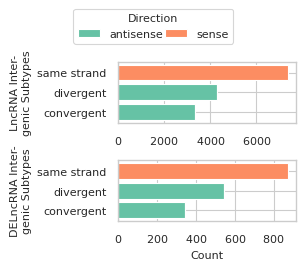

In [116]:
# Compute the counts for the top and bottom plot
counts_top = datab_intergenic.groupby(['subtype', 'direction'])['lncRNA_transcript'].count().unstack().fillna(0)
counts_bottom = datab_intergenic.loc[datab_intergenic['subset'] == 'deg lncRNA'].groupby(['subtype', 'direction'])['lncRNA_transcript'].count().unstack().fillna(0)

# Create a subplot figure with two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=((8/2.54), (6/2.54)))  # Adjust height for two plots

# Function to create the bar chart on a given axis
def create_bar_chart(ax, counts, ylabel, xlabel=''):
    sns.set_theme(style='whitegrid', palette='Set2', context='paper', 
                  rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 
                      'legend.fontsize': 8, 'legend.title_fontsize': 8, 
                      "axes.formatter.use_mathtext": True})

    # Create a color palette for different directions
    palette = sns.color_palette("Set2", len(counts.columns))

    # Create the horizontal bars with color mapping to df['direction']
    bars = []
    for idx, (column, color) in enumerate(zip(counts.columns, palette)):
        bar = ax.barh(counts.index, counts[column], left=counts.iloc[:, :idx].sum(axis=1), label=column, color=color)
        bars.append(bar)

    # Labeling the axes
    ax.set_ylabel(ylabel)  # y-axis label customized per subplot
    ax.set_xlabel(xlabel)  # x-axis label customized per subplot (only for the lower subplot)

# Create the plots with different counts data and custom y-axis labels
create_bar_chart(axes[0], counts_top, 'LncRNA Inter-\ngenic Subtypes')
create_bar_chart(axes[1], counts_bottom, 'DELncRNA Inter-\ngenic Subtypes', 'Count')

# Create a single legend for the whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Direction", bbox_to_anchor=(0.5, 1.05), loc='center', ncol=3, columnspacing=.2)

# Adjust margins to ensure elements fit well within each subplot
fig.subplots_adjust(left=0.25, right=0.8, top=0.85, hspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust tight_layout to leave space for the legend

# Save the plot
plt.savefig('lncRNA_classes_intergenic_overview.svg', bbox_inches='tight')

# Display the plot
plt.show()


# 5 Genic

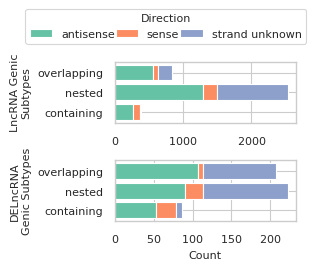

In [117]:
# Compute the counts for the top and bottom plot
counts_top = datab_genic.groupby(['subtype', 'direction'])['lncRNA_transcript'].count().unstack().fillna(0)
counts_bottom = datab_genic.loc[datab_genic['subset'] == 'deg lncRNA'].groupby(['subtype', 'direction'])['lncRNA_transcript'].count().unstack().fillna(0)

# Create a subplot figure with two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=((8/2.54), (6/2.54)))  # Adjust height for two plots

# Function to create the bar chart on a given axis
def create_bar_chart(ax, counts, ylabel, xlabel=''):
    sns.set_theme(style='whitegrid', palette='Set2', context='paper', 
                  rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 
                      'legend.fontsize': 8, 'legend.title_fontsize': 8, 
                      "axes.formatter.use_mathtext": True})

    # Create a color palette for different directions
    palette = sns.color_palette("Set2", len(counts.columns))

    # Create the horizontal bars with color mapping to df['direction']
    bars = []
    for idx, (column, color) in enumerate(zip(counts.columns, palette)):
        bar = ax.barh(counts.index, counts[column], left=counts.iloc[:, :idx].sum(axis=1), label=column, color=color)
        bars.append(bar)

    # Labeling the axes
    ax.set_ylabel(ylabel)  # y-axis label customized per subplot
    ax.set_xlabel(xlabel)  # x-axis label customized per subplot (only for the lower subplot)

# Create the plots with different counts data and custom y-axis labels
create_bar_chart(axes[0], counts_top, 'LncRNA Genic\nSubtypes')
create_bar_chart(axes[1], counts_bottom, 'DELncRNA\nGenic Subtypes', 'Count')

# Create a single legend for the whole figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Direction", bbox_to_anchor=(0.54, 1.05), loc='center', ncol=3, columnspacing=.1)

# Adjust margins to ensure elements fit well within each subplot
fig.subplots_adjust(left=0.25, right=0.8, top=0.8, hspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust tight_layout to leave space for the legend

# Save the plot
plt.savefig('lncRNA_classes_genic_overview.svg', bbox_inches='tight')

# Display the plot
plt.show()


# 6 Types of lncRNA

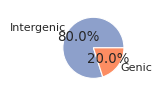

In [118]:
# Plot the Pie chart
sns.set_theme(style='whitegrid', palette='Set2', context='paper', 
              rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 
                  'legend.fontsize': 8, 'legend.title_fontsize': 8, 
                  "axes.formatter.use_mathtext": True})
plt.figure(figsize=((4/2.54), (4/2.54)))
plt.pie(datab['type'].value_counts(), autopct='%1.1f%%', 
        labels=['Intergenic', 'Genic'], colors=['#8DA0CB', '#FC8D62'])
# Display the plot
plt.tight_layout()
plt.savefig('lncRNA_classes_venn.svg')
plt.show()

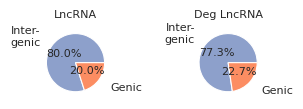

In [119]:
# Set theme for Seaborn plots
sns.set_theme(style='whitegrid', palette='Set2', context='paper',
              rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8,
                  'legend.fontsize': 8, 'legend.title_fontsize': 8,
                  "axes.formatter.use_mathtext": True})

# Create a figure with 2 subplots
fig = plt.figure(figsize=((10 / 2.54), (6 / 2.54)))

# Add the pie chart subplot
ax1 = fig.add_subplot(1, 3, 1)
ax1.pie(datab['type'].value_counts(), autopct='%1.1f%%',
        labels=['Inter-\ngenic', 'Genic'], colors=['#8DA0CB', '#FC8D62'], 
        labeldistance=1.5, pctdistance=0.5, textprops={'fontsize': 8})
ax1.set_title("LncRNA", fontsize=8)

# Add the second pie chart subplot
ax2 = fig.add_subplot(1, 3, 2)
ax2.pie(datab.loc[datab['subset'] == 'deg lncRNA', 'type'].value_counts(), autopct='%1.1f%%',
        labels=['Inter-\ngenic', 'Genic'], colors=['#8DA0CB', '#FC8D62'], 
        labeldistance=1.5, pctdistance=0.5, textprops={'fontsize': 8})
ax2.set_title('Deg LncRNA', fontsize=8)

# Adjust layout to prevent overlap and remove white space
plt.tight_layout()
plt.subplots_adjust(left=0.02, right=0.98, top=0.9, bottom=0.1)

# Save the plot with tight bounding box
plt.savefig('lncRNA_classes_overview.svg', bbox_inches='tight')

# Display the plot
plt.show()


# 7 Heatmap for delncRNA

In [120]:
delnc
# export the subset of deg lncRNAs
delnc.to_csv('10_3_deg_lncRNA_interactionpartners/delncrna_interaction_partners.txt', sep='\t', index=False)

In [121]:
# import transcript expression information - gene matrix count 
expr_trans = pd.read_csv('../10_lncRNA_classification/10_2_expression_for_heatmap/10_2_2_expression_transcript/gene_matrix_count.csv')
# import gene expression information - gene matrix count 
expr_gene = pd.read_csv('../10_lncRNA_classification/10_2_expression_for_heatmap/10_2_1_expression_gene/gene_matrix_count.csv')

In [122]:
# filter the gene matrix trandcript expression data for the interaction partners of the deg lncRNAs
expr_trans = expr_trans.loc[expr_trans['Geneid'].isin(delnc['partnerRNA_transcript'])]
expr_gene = expr_gene.loc[expr_gene['Geneid'].isin(delnc['partnerRNA_gene'])]
# set Geneid as index
expr_trans = expr_trans.set_index('Geneid')
expr_gene = expr_gene.set_index('Geneid')
# filter to only keep rows if they have more than 50 reads
expr_trans = expr_trans[(expr_trans.sum(axis=1) >= 50)]
expr_gene = expr_gene[(expr_gene.sum(axis=1) >= 50)]
# Specify the desired column order
column_order = ['N14', 'N15', 'N16', 'N17', 'N18', 'N21', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13']
# Reorder the dataframe columns
expr_trans = expr_trans.reindex(columns=column_order)
expr_gene = expr_gene.reindex(columns=column_order)

## Heatmap lncRNA interaction partner - GENE level 

/home/maggy/anaconda3/envs/lncrna/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/tmp/ipykernel_8734/1038577640.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_8734/1038577640.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


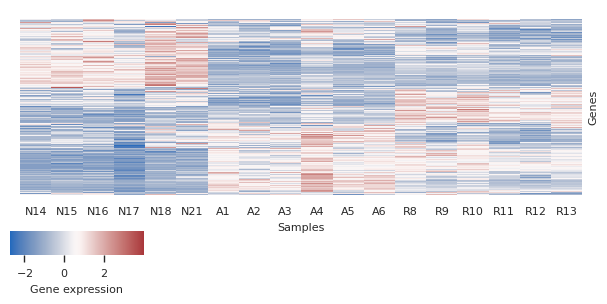

In [123]:
# Set the theme and context
sns.set_theme(style='whitegrid', context='paper', 
              rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8,
                  'legend.fontsize': 8, 'legend.title_fontsize': 8})

# Create the clustermap
g = sns.clustermap(expr_gene, figsize=(17/2.54, 6/2.54), z_score=0, yticklabels=False,
                   cmap='vlag', col_cluster=False, cbar_pos=(0.1, -0.1, 0.2, .1),
                   cbar_kws={'label': 'Gene expression', 'orientation':'horizontal'}, dendrogram_ratio=(0.1, 0.05))

# Set axis labels
g.ax_heatmap.set_xlabel('Samples')
g.ax_heatmap.set_ylabel('Genes')
# Hide the row dendrogram
g.ax_row_dendrogram.set_visible(False)
# Adjust layout
plt.tight_layout()
#Export as SVG
g.savefig('lncRNA_interactionpartner_expression_genes.svg')
g.savefig('lncRNA_interactionpartner_expression_genes.png', dpi=600)


# 8 PCA plot of the DElncRNA interaction partners

In [124]:
sex = pd.Series({
    'A1': 'male', 
    'A2': 'male', 
    'A3': 'male', 
    'A4': 'female', 
    'A5': 'male', 
    'A6': 'female', 
    'R8': 'male', 
    'R9': 'female', 
    'R10': 'male', 
    'R11': 'male', 
    'R12': 'male', 
    'R13': 'male', 
    'N14': 'female', 
    'N15': 'male', 
    'N16': 'female', 
    'N17': 'male', 
    'N18': 'female', 
    'N21': 'male'
})
sex_binary = pd.Series({key: 0 if value == 'male' else 1 for key, value in sex.items()})

# reset indx and transform 
expr_gene = expr_gene.T
expr_gene['sex'] = sex_binary[expr_gene.index]
sex = sex[expr_gene.index]

In [125]:
# use standard Scaler from sklearn preprocessing to scale the data
scaler = preprocessing.StandardScaler()
X_scaled  = scaler.fit_transform(expr_gene)

# decomposition from many components to only 2 (to be able to plot it) 
pca = PCA(n_components=2)
expr_gene_transfomred = pca.fit_transform(X_scaled)
# print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.39915253 0.20919287]


In [126]:
# convert the sample names to uniform condition names for plot legend 
def transform_index_to_number(sample:str)->int:
    """Transform the index of the counts dataframe to a number"""
    if sample.startswith('N'):
        return 'Normoxia'
    elif sample.startswith('A'):
        return 'Anoxia'
    elif sample.startswith('R'):
        return 'Reoxygenation'

colors = expr_gene.index.map(transform_index_to_number)

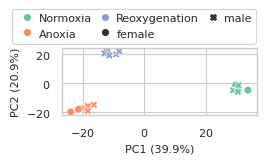

In [127]:
# PLOT 
sns.set_theme(palette = 'Set2', style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})
plt.figure(figsize=((7/2.54), (4.5/2.54)))
g = sns.scatterplot(x=expr_gene_transfomred[:,0], y=expr_gene_transfomred[:,1], hue=colors, hue_order=['Normoxia', 'Anoxia', 'Reoxygenation'], s=30, style=sex.values, markers=['o', 'X'])
sns.move_legend(g,  markerscale=0.9, loc='lower right', ncol=3, bbox_to_anchor=(1, 1.05), frameon=True, columnspacing=0.2, scatteryoffsets=[0.6], handletextpad=0.01, borderaxespad=0.1)

#g.add_legend(title='', fontsize=8, loc='upper center', borderaxespad=0.1, ncol=2, bbox_to_anchor=(.33, 0.02), frameon=True)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')

plt.tight_layout()
# export 
plt.savefig('PCA_clustering_DElncRNAinteractionpartner.svg')